In [1]:
import pandas as pd
import numpy as np


In [2]:
ap=pd.read_csv('stocks(2000-2021)csvfile/ADANIPORTS.csv')

In [3]:
import bokeh
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import DatetimeAxis
import datetime

In [4]:
output_notebook()
ap['Date']=pd.to_datetime(ap['Date'])
p=figure(width=1000,height=400)
p.line(ap.Date,ap.Close,line_width=0.5,line_color='black')
show(p)


Loading BokehJS ...

In [5]:
ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                3322 non-null   datetime64[ns]
 1   Symbol              3322 non-null   object        
 2   Series              3322 non-null   object        
 3   Prev Close          3322 non-null   float64       
 4   Open                3322 non-null   float64       
 5   High                3322 non-null   float64       
 6   Low                 3322 non-null   float64       
 7   Last                3322 non-null   float64       
 8   Close               3322 non-null   float64       
 9   VWAP                3322 non-null   float64       
 10  Volume              3322 non-null   int64         
 11  Turnover            3322 non-null   float64       
 12  Trades              2456 non-null   float64       
 13  Deliverable Volume  3322 non-null   int64       

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
lr=LinearRegression()

In [8]:
x=ap[['Date','Prev Close','Open','High','Low','Last','VWAP']]

In [9]:
y=ap[['Date','Close']]

In [10]:
ap

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,2021-04-26,ADANIPORTS,EQ,725.35,733.00,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,116457.0,838079,0.0892
3318,2021-04-27,ADANIPORTS,EQ,730.75,735.00,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,236896.0,1779639,0.0865
3319,2021-04-28,ADANIPORTS,EQ,749.15,755.00,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,130847.0,1342353,0.1203
3320,2021-04-29,ADANIPORTS,EQ,746.25,753.20,765.85,743.40,746.4,746.75,753.06,13851910,1.043139e+15,153293.0,1304895,0.0942


In [11]:
x_train = ap.loc[ap['Date'] <= '2018-01-01', ['Prev Close', 'Open', 'High', 'Low', 'Last', 'VWAP']]
y_train = ap.loc[ap['Date'] <= '2018-01-01', 'Close']

In [12]:
x_test = ap.loc[ap['Date'] > '2018-01-01', ['Prev Close', 'Open', 'High', 'Low', 'Last', 'VWAP']]
y_test = ap.loc[ap['Date'] > '2018-01-01', 'Close']


In [13]:
x_train

,Prev Close,Open,High,Low,Last,VWAP
0,440.00,770.00,1050.00,770.00,959.00,984.72
1,962.90,984.00,990.00,874.00,885.00,941.38
2,893.90,909.00,914.75,841.00,887.00,888.09
3,884.20,890.00,958.00,890.00,929.00,929.17
4,921.55,939.75,995.00,922.00,980.00,965.65
...,...,...,...,...,...,...
2495,402.15,403.75,405.85,400.20,404.50,403.43
2496,404.55,405.95,407.00,400.70,402.50,404.29
2497,404.20,404.20,404.90,397.55,399.05,400.13
2498,398.70,401.15,407.15,399.30,406.70,403.21


In [14]:
lr.fit(x_train,y_train)

LinearRegression()

In [15]:
y_lr=lr.predict(x_test)
# y_lr=pd.Series(y_lr,index=y_test.index)

In [16]:
y_lr=pd.Series(y_lr,index=y_test.index)


In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
mse = mean_squared_error(y_test, y_lr)

In [19]:
mse

1.4142612303622237

In [20]:
np.sqrt(mse)

1.1892271567544292

In [21]:
show(p)

In [22]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [23]:
import matplotlib.pyplot as plt

def plot_pred(y_true, y_pred, figsize=(10, 6)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot(y_true.index, y_true, label='Actual')
    ax.plot(y_pred.index, y_pred, label='Predicted')
    ax.set_xlabel('Index')
    ax.set_ylabel('Value')
    ax.set_title('Actual vs. Predicted')
    ax.legend()
    plt.show()



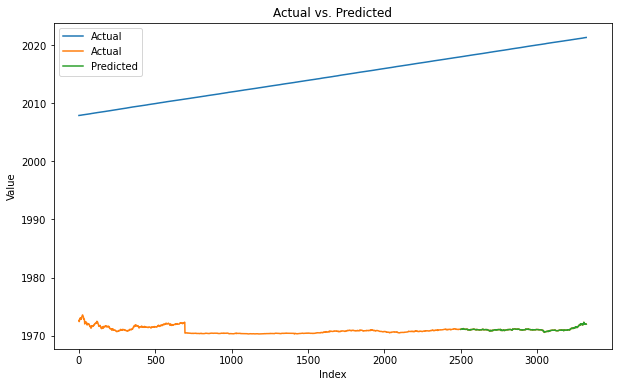

In [24]:
plot_pred(y, y_lr)

In [25]:
y_lr


2500    397.702438
2501    408.565122
2502    410.013558
2503    423.435145
2504    422.986971
           ...    
3317    729.797901
3318    748.245912
3319    744.271292
3320    747.037621
3321    728.590721
Length: 822, dtype: float64

In [26]:
y_test


2500    397.40
2501    407.65
2502    409.85
2503    423.80
2504    422.90
         ...  
3317    730.75
3318    749.15
3319    746.25
3320    746.75
3321    730.05
Name: Close, Length: 822, dtype: float64

In [27]:

def plot_pred2(y_test, y_pred, figsize=(10, 6)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot(y_test.index, y_test, label='Actual')
    ax.plot(y_test.index, y_pred, label='Predicted')
    ax.set_xlabel('Index')
    ax.set_ylabel('Value')
    ax.set_title('Actual vs. Predicted')
    ax.legend()
    plt.show()


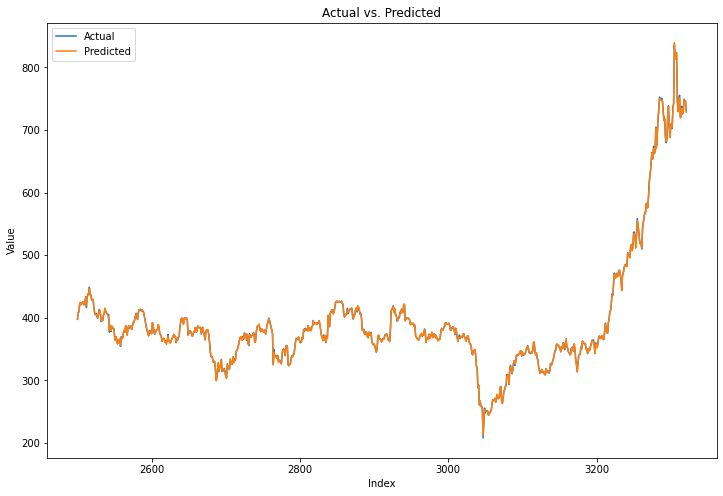

In [28]:
plot_pred2(y_test, y_lr, figsize=(12, 8))

In [29]:
x

,Date,Prev Close,Open,High,Low,Last,VWAP
0,2007-11-27,440.00,770.00,1050.00,770.00,959.0,984.72
1,2007-11-28,962.90,984.00,990.00,874.00,885.0,941.38
2,2007-11-29,893.90,909.00,914.75,841.00,887.0,888.09
3,2007-11-30,884.20,890.00,958.00,890.00,929.0,929.17
4,2007-12-03,921.55,939.75,995.00,922.00,980.0,965.65
...,...,...,...,...,...,...,...
3317,2021-04-26,725.35,733.00,739.65,728.90,729.2,733.25
3318,2021-04-27,730.75,735.00,757.50,727.35,748.6,747.67
3319,2021-04-28,749.15,755.00,760.00,741.10,743.4,751.02
3320,2021-04-29,746.25,753.20,765.85,743.40,746.4,753.06


In [30]:
lr.predict(pd.DataFrame([[688.10,698.90,753.40,693.15,730.10,732.75]],columns=['Prev Close','Open','High','Low',
'Last','VWAP']))

array([730.07643109])

In [31]:
import pickle

In [32]:
pickle.dump(lr,open('input.pkl','wb'))

In [33]:
model=pickle.load(open('input.pkl','rb'))

In [34]:
print(model.predict([[688.10,698.90,753.40,693.15,730.10,732.75]]))

[730.07643109]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
